In [1]:
print("all ok")

all ok


In [2]:
import sys, os

# Get project root — one level up from 'research_and_analyst'
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

print("Project root added to path:", project_root)

Project root added to path: e:\KrishnaikProjects\Alps-automated-research-report-generation\automated-research-report-generation


In [3]:
from research_and_analyst.utils.model_loader import ModelLoader

In [4]:
model_loader = ModelLoader()

{"timestamp": "2025-11-02T09:25:51.916933Z", "level": "info", "event": "Initializing ApiKeyManager"}
{"timestamp": "2025-11-02T09:25:51.917979Z", "level": "info", "event": "OPENAI_API_KEY loaded successfully from environment"}
{"timestamp": "2025-11-02T09:25:51.919003Z", "level": "warning", "event": "GOOGLE_API_KEY is missing in environment variables"}
{"timestamp": "2025-11-02T09:25:51.920037Z", "level": "info", "event": "GROQ_API_KEY loaded successfully from environment"}
{"path": "E:\\KrishnaikProjects\\Alps-automated-research-report-generation\\automated-research-report-generation\\research_and_analyst\\config\\configuration.yaml", "keys": ["astra_db", "embedding_model", "retriever", "llm"], "timestamp": "2025-11-02T09:25:51.932537Z", "level": "info", "event": "Configuration loaded successfully"}
{"config_keys": ["astra_db", "embedding_model", "retriever", "llm"], "timestamp": "2025-11-02T09:25:51.933545Z", "level": "info", "event": "YAML configuration loaded successfully"}


In [5]:
llm=model_loader.load_llm()

{"provider": "openai", "model": "gpt-4o", "timestamp": "2025-11-02T09:25:54.783330Z", "level": "info", "event": "Loading LLM"}
{"provider": "openai", "model": "gpt-4o", "timestamp": "2025-11-02T09:25:56.212102Z", "level": "info", "event": "LLM loaded successfully"}


In [6]:
llm.invoke("hi").content

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


'Hello! How can I assist you today?'

In [7]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

In [8]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage,HumanMessage , SystemMessage
from langgraph.checkpoint.memory import MemorySaver

#health

Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
        ),

Analyst(
    name="Dr. Arun Verma",
    role="Ethics Researcher",
    affiliation="WHO",
    description="Explores ethical implications of AI in diagnostics."
),
Analyst(
    name="Ms. Priya Sharma",
    role="Policy Analyst",
    affiliation="Ministry of Health",
    description="Investigates AI policy and compliance frameworks."
)

In [10]:
class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst.")
    role: str = Field(description="Role of the analyst in the context of the topic.")
    affiliation: str = Field(description="Primary affiliation of the analyst.")
    description: str = Field(description="Description of the analyst focus, concerns, and motives.")
    
    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"
    

In [11]:
Analyst(
    name="sunny savita",
    role="genai eng",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

Analyst(name='sunny savita', role='genai eng', affiliation='AI Research LAB', description='I am genai developer as well as mentor')

In [12]:
analyst = Analyst(
    name="sunny savita",
    role="genai eng",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

In [13]:
analyst.name

'sunny savita'

In [14]:
analyst.role

'genai eng'

In [17]:
analyst.affiliation

'AI Research LAB'

In [16]:
print(analyst.persona)

Name: sunny savita
Role: genai eng
Affiliation: AI Research LAB
Description: I am genai developer as well as mentor



In [18]:
class Perspectives(BaseModel):
       analysts: List[Analyst] = Field(description="Comprehensive list of analysts with their roles and affiliations.")

In [19]:
class GenerateAnalystsState(TypedDict):
    topic: str #research topic
    max_analysts: int # number of analyst
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions
    

In [20]:
GenerateAnalystsState(
    topic = "finance",
    max_analysts= 5,
    human_analyst_feedback= "give the real info",  
)

{'topic': 'finance',
 'max_analysts': 5,
 'human_analyst_feedback': 'give the real info'}

In [21]:
Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
    ),

(Analyst(name='Dr. Neha Patel', role='Medical Data Scientist', affiliation='Stanford Medicine', description='Focuses on predictive models for patient outcomes.'),)

In [22]:
analyst_instructions="""You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [23]:
print([analyst_instructions.format(
        topic="education",
        max_analysts=4,
        human_analyst_feedback="please exaplain only on AI"
        
        )] + ["Generate the set of analysts."])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']


['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']

In [24]:
def create_analyst(state:GenerateAnalystsState):
    """
    it is creating my analyst
    
    """
    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analyst_feedback = state.get("human_analyst_feedback","")
    
    structured_llm = llm.with_structured_output(Perspectives)
    
    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analyst_feedback
        
        )
    analysts = structured_llm.invoke([SystemMessage(content=system_messages)]+ [HumanMessage(content="Generate the set of analysts.")])
    
    # Write the list of analysis to state
    return {"analysts": analysts.analysts}
    

In [25]:
create_analyst(
    {'topic': 'health',
    'max_analysts': 2,
    'human_analyst_feedback': 'give the real info'}
    )

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'analysts': [Analyst(name='Dr. Emily Chen', role='Public Health Analyst', affiliation='World Health Organization', description='Dr. Chen focuses on global health trends, particularly the impact of pandemics on public health systems. Her work involves analyzing data to improve health outcomes and preparedness strategies. She is concerned with how health policies can be optimized to prevent future health crises and is motivated by a commitment to equitable healthcare access worldwide.'),
  Analyst(name='Dr. Raj Patel', role='Healthcare Technology Analyst', affiliation='MIT Media Lab', description='Dr. Patel specializes in the intersection of technology and healthcare, exploring how innovations like AI and telemedicine can transform patient care. His focus is on the integration of digital tools in healthcare settings to enhance efficiency and patient outcomes. He is driven by the potential of technology to democratize healthcare access and improve the quality of life for patients globall

In [26]:
def human_feedback(state):
    """ No-op node that should be interrupted on """
    pass

In [27]:
def should_continue(state):
    feedback = (state.get("human_analyst_feedback") or "").strip().lower()
    if feedback and feedback not in ["", "none", "skip", "done", "continue"]:
        return "create_analyst"
    return END


In [ ]:
# def should_continue(state):
#     """ Return the next node to execute """
#     human_analyst_feedback = state.get("human_analyst_feedback",None)
#     if human_analyst_feedback:
#         return "create_analyst"

In [28]:
from IPython.display import Image, display

## First Workflow

In [29]:
builder = StateGraph(GenerateAnalystsState)

In [30]:
builder.add_node("create_analyst",create_analyst)
builder.add_node("human_feedback", human_feedback)

In [31]:
builder.add_edge(START,"create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges("human_feedback",
                        should_continue,
                        ["create_analyst",
                        END])

In [32]:
memory = MemorySaver()

In [33]:
graph = builder.compile(interrupt_before= ["human_feedback"],checkpointer= memory)

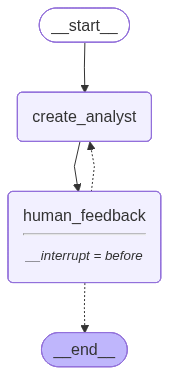

In [34]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [35]:
topic = "the benefits of adopting Langgraph as an agent framework"

In [36]:
max_analysts = 4

In [37]:
thread =  {"configurable":{"thread_id":1}}

In [38]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  
            
        

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Name: Dr. Emily Chen
Affiliation: Institute of Advanced AI Systems
Role: AI Framework Researcher
Description: Dr. Chen focuses on the comparative analysis of AI frameworks, with a particular interest in how Langgraph enhances agent-based systems. Her research examines the scalability and flexibility of Langgraph in various applications, aiming to understand its potential to streamline AI development processes.
--------------------------------------------------
Name: Raj Patel
Affiliation: Tech Innovators Inc.
Role: Software Developer
Description: Raj is a software developer who specializes in integrating new technologies into existing systems. He is interested in the practical benefits of adopting Langgraph, such as improved efficiency and reduced development time. Raj evaluates how Langgraph can be seamlessly integrated into current software ecosystems to enhance performance.
--------------------------------------------------
Name: Sophia Martinez
Affiliation: Global AI Ethics Consort

In [39]:
state = graph.get_state(thread)

In [40]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Dr. Emily Chen', role='AI Framework Researcher', affiliation='Institute of Advanced AI Systems', description='Dr. Chen focuses on the comparative analysis of AI frameworks, with a particular interest in how Langgraph enhances agent-based systems. Her research examines the scalability and flexibility of Langgraph in various applications, aiming to understand its potential to streamline AI development processes.'), Analyst(name='Raj Patel', role='Software Developer', affiliation='Tech Innovators Inc.', description='Raj is a software developer who specializes in integrating new technologies into existing systems. He is interested in the practical benefits of adopting Langgraph, such as improved efficiency and reduced development time. Raj evaluates how Langgraph can be seamlessly integrated into current software ecosystems to enhance performance.'), Anal

In [41]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'analysts': [Analyst(name='Dr. Emily Chen', role='AI Framework Researcher', affiliation='Institute of Advanced AI Systems', description='Dr. Chen focuses on the comparative analysis of AI frameworks, with a particular interest in how Langgraph enhances agent-based systems. Her research examines the scalability and flexibility of Langgraph in various applications, aiming to understand its potential to streamline AI development processes.'),
  Analyst(name='Raj Patel', role='Software Developer', affiliation='Tech Innovators Inc.', description='Raj is a software developer who specializes in integrating new technologies into existing systems. He is interested in the practical benefits of adopting Langgraph, such as improved efficiency and reduced development time. Raj evaluates how Langgraph can be seamlessly integrated into current software ecosystems to enhance performance.'),
  Analyst(name='Sophi

In [42]:
state.next

('human_feedback',)

In [43]:
# memory.storage

In [44]:
memory.storage.items()

dict_items([('1', defaultdict(<class 'dict'>, {'': {'1f0b7ce3-e125-6d0d-bfff-a8f19916459d': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-11-02T09:28:08.102222+00:00\xa2id\xd9$1f0b7ce3-e125-6d0d-bfff-a8f19916459d\xb0channel_versions\x81\xa9__start__\xd9400000000000000000000000000000001.0.06297121588353649\xadversions_seen\x81\xa9__input__\x80\xb0updated_channels\x91\xa9__start__'), ('msgpack', b'\x83\xa6source\xa5input\xa4step\xff\xa7parents\x80'), None), '1f0b7ce3-e128-6662-8000-46bd71fca3b8': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-11-02T09:28:08.103280+00:00\xa2id\xd9$1f0b7ce3-e128-6662-8000-46bd71fca3b8\xb0channel_versions\x84\xa9__start__\xd9300000000000000000000000000000002.0.8032783898155345\xa5topic\xd9300000000000000000000000000000002.0.8032783898155345\xacmax_analysts\xd9300000000000000000000000000000002.0.8032783898155345\xb8branch:to:create_analyst\xd9300000000000000000000000000000002.0.8032783898155345\xadversions_seen\x82\xa9__input__\x80\xa9__start__\x81\xa9__start__\x

In [91]:
# import msgpack

# for thread_id, ns_dict in memory.storage.items():
#     print(f"\n Thread ID: {thread_id}")
    
#     # ns_dict = defaultdict(dict, {'': {...}})
#     for ns, ckpts in ns_dict.items():
#         print(f"  Namespace: '{ns}'")
        
#         # ckpts = dict of {checkpoint_id: (packed_values, packed_metadata, parent_id)}
#         for ckpt_id, (packed_values, packed_metadata, parent_id) in ckpts.items():
#             print(f"    Checkpoint ID: {ckpt_id}")
            
#             # Decode msgpack binary
#             values = msgpack.unpackb(packed_values[1], raw=False)
#             meta = msgpack.unpackb(packed_metadata[1], raw=False)
            
#             print(f"    Values keys: {list(values.keys())}")
#             print(f"    Parent ID: {parent_id}")
#             print(f"    Metadata: {meta}")
#             print("-" * 80)


In [45]:
state.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b7ce4-2e54-6ee5-8001-90dc4a1ee58a'}}

In [46]:
graph.update_state(thread,
                   {"human_analyst_feedback":"add something from the startup perspective and focus on the latest enterprise application"},as_node="human_feedback"
                   )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b7ce5-73ec-6747-8002-5dfe1542ec00'}}

In [47]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  

Name: Dr. Emily Chen
Affiliation: Institute of Advanced AI Systems
Role: AI Framework Researcher
Description: Dr. Chen focuses on the comparative analysis of AI frameworks, with a particular interest in how Langgraph enhances agent-based systems. Her research examines the scalability and flexibility of Langgraph in various applications, aiming to understand its potential to streamline AI development processes.
--------------------------------------------------
Name: Raj Patel
Affiliation: Tech Innovators Inc.
Role: Software Developer
Description: Raj is a software developer who specializes in integrating new technologies into existing systems. He is interested in the practical benefits of adopting Langgraph, such as improved efficiency and reduced development time. Raj evaluates how Langgraph can be seamlessly integrated into current software ecosystems to enhance performance.
--------------------------------------------------
Name: Sophia Martinez
Affiliation: Global AI Ethics Consort

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Name: Sophia Tran
Affiliation: Tech Innovators Network
Role: Startup Ecosystem Analyst
Description: Sophia focuses on how emerging technologies can be leveraged by startups to gain competitive advantages. She is particularly interested in how Langgraph can streamline operations and reduce costs for startups, enabling them to scale more efficiently.
--------------------------------------------------
Name: Raj Patel
Affiliation: Global Enterprise Consulting
Role: Enterprise Solutions Specialist
Description: Raj specializes in evaluating the latest enterprise applications and their impact on large organizations. He is keen on understanding how Langgraph can enhance enterprise-level operations, improve data integration, and support complex decision-making processes.
--------------------------------------------------
Name: Elena Garcia
Affiliation: Institute of Advanced AI Studies
Role: AI Framework Researcher
Description: Elena's research focuses on the development and application of AI fr

In [48]:
state = graph.get_state(thread)

In [49]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application', 'analysts': [Analyst(name='Sophia Tran', role='Startup Ecosystem Analyst', affiliation='Tech Innovators Network', description='Sophia focuses on how emerging technologies can be leveraged by startups to gain competitive advantages. She is particularly interested in how Langgraph can streamline operations and reduce costs for startups, enabling them to scale more efficiently.'), Analyst(name='Raj Patel', role='Enterprise Solutions Specialist', affiliation='Global Enterprise Consulting', description='Raj specializes in evaluating the latest enterprise applications and their impact on large organizations. He is keen on understanding how Langgraph can enhance enterprise-level operations, improve data integration, and support complex decision-making processes.'), An

In [50]:
state.next

('human_feedback',)

In [51]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application',
 'analysts': [Analyst(name='Sophia Tran', role='Startup Ecosystem Analyst', affiliation='Tech Innovators Network', description='Sophia focuses on how emerging technologies can be leveraged by startups to gain competitive advantages. She is particularly interested in how Langgraph can streamline operations and reduce costs for startups, enabling them to scale more efficiently.'),
  Analyst(name='Raj Patel', role='Enterprise Solutions Specialist', affiliation='Global Enterprise Consulting', description='Raj specializes in evaluating the latest enterprise applications and their impact on large organizations. He is keen on understanding how Langgraph can enhance enterprise-level operations, improve data integration, and support complex decision-making processes.'),
  Analyst(name='El

In [99]:
# import msgpack

# def get_all_checkpoints(memory, thread_id="1"):
#     """Return all checkpoints in chronological order for a thread."""
#     checkpoints = []
#     ns_dict = memory.storage.get(thread_id, {})
#     if "" not in ns_dict:
#         return []

#     for ckpt_id, (packed_values, packed_meta, parent_id) in ns_dict[""].items():
#         values = msgpack.unpackb(packed_values[1], raw=False)
#         meta = msgpack.unpackb(packed_meta[1], raw=False)
#         checkpoints.append({
#             "id": ckpt_id,
#             "parent": parent_id,
#             "topic": values.get("topic"),
#             "feedback": values.get("human_analyst_feedback"),
#             "analyst_count": len(values.get("analysts", [])),
#             "analysts": [a.model_dump() for a in values.get("analysts", [])],
#             "step": meta.get("step"),
#             "created_at": values.get("ts", None)
#         })
#     return checkpoints

# # Fetch all
# history = get_all_checkpoints(memory)

# # Sort by step (to get chronological order)
# history = sorted(history, key=lambda x: (x["step"] or 0))

# # Display neatly
# for h in history:
#     print(f"\nSTEP {h['step']} | CHECKPOINT {h['id']}")
#     print(f"Parent: {h['parent']}")
#     print(f"Topic: {h['topic']}")
#     print(f"Feedback: {h['feedback']}")
#     print(f"Analysts generated: {h['analyst_count']}")
#     print("-"*100)


In [52]:
# If we are satisfied, then we simply supply no feedback
further_feedack = ""

In [53]:
# 1) Get the latest state (you're paused at 'human_feedback')
state = graph.get_state(thread)

# 2) Use the exact config from that state (it already has thread_id, checkpoint_ns, checkpoint_id)
cfg = state.config

In [54]:
# 3) Update feedback at the 'human_feedback' node
#    Tip: if your TypedDict says `human_analyst_feedback: str`, prefer "" (empty string) over None
graph.update_state(cfg, {"human_analyst_feedback": ""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b7ce6-a998-6367-8006-877c4233ecdf'}}

In [55]:
# 4) Verify it moved to END
final_state = graph.get_state(thread)
print(final_state.next)  # should be (END,)


()


In [56]:
analysts = final_state.values.get('analysts')

In [57]:
analysts

[Analyst(name='Sophia Tran', role='Startup Ecosystem Analyst', affiliation='Tech Innovators Network', description='Sophia focuses on how emerging technologies can be leveraged by startups to gain competitive advantages. She is particularly interested in how Langgraph can streamline operations and reduce costs for startups, enabling them to scale more efficiently.'),
 Analyst(name='Raj Patel', role='Enterprise Solutions Specialist', affiliation='Global Enterprise Consulting', description='Raj specializes in evaluating the latest enterprise applications and their impact on large organizations. He is keen on understanding how Langgraph can enhance enterprise-level operations, improve data integration, and support complex decision-making processes.'),
 Analyst(name='Elena Garcia', role='AI Framework Researcher', affiliation='Institute of Advanced AI Studies', description="Elena's research focuses on the development and application of AI frameworks. She is interested in the technical benefi

In [59]:
for analyst in analysts:
    print(f"Name: {analyst.name}")
    print(f"Affiliation: {analyst.affiliation}")
    print(f"Role: {analyst.role}")
    print(f"Description: {analyst.description}")
    print("-" * 50) 

Name: Sophia Tran
Affiliation: Tech Innovators Network
Role: Startup Ecosystem Analyst
Description: Sophia focuses on how emerging technologies can be leveraged by startups to gain competitive advantages. She is particularly interested in how Langgraph can streamline operations and reduce costs for startups, enabling them to scale more efficiently.
--------------------------------------------------
Name: Raj Patel
Affiliation: Global Enterprise Consulting
Role: Enterprise Solutions Specialist
Description: Raj specializes in evaluating the latest enterprise applications and their impact on large organizations. He is keen on understanding how Langgraph can enhance enterprise-level operations, improve data integration, and support complex decision-making processes.
--------------------------------------------------
Name: Elena Garcia
Affiliation: Institute of Advanced AI Studies
Role: AI Framework Researcher
Description: Elena's research focuses on the development and application of AI fr

In [ ]:
"The benefits of adopting LangGraph as an agent framework"

In [60]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:500])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 


Either you can use Google Serper API or use duckduckgo

In [62]:
from langchain_community.document_loaders import WikipediaLoader
docs = WikipediaLoader(query="The benefits of adopting AWS Cloud").load()
print(docs[0].page_content[:500])

Cloud computing is "a paradigm for enabling network access to a scalable and elastic pool of shareable physical or virtual resources with self-service provisioning and administration on-demand," according to ISO. It is commonly referred to as "the cloud".


== Characteristics ==
In 2011, the National Institute of Standards and Technology (NIST) identified five "essential characteristics" for cloud systems. Below are the exact definitions according to NIST:

On-demand self-service: "A consumer ca


In [63]:
from langchain_community.document_loaders import WikipediaLoader
docs = WikipediaLoader(query="The benefits of adopting AWS Cloud").load()
print(docs)

[Document(metadata={'title': 'Cloud computing', 'summary': 'Cloud computing is "a paradigm for enabling network access to a scalable and elastic pool of shareable physical or virtual resources with self-service provisioning and administration on-demand," according to ISO. It is commonly referred to as "the cloud".\n\n', 'source': 'https://en.wikipedia.org/wiki/Cloud_computing'}, page_content='Cloud computing is "a paradigm for enabling network access to a scalable and elastic pool of shareable physical or virtual resources with self-service provisioning and administration on-demand," according to ISO. It is commonly referred to as "the cloud".\n\n\n== Characteristics ==\nIn 2011, the National Institute of Standards and Technology (NIST) identified five "essential characteristics" for cloud systems. Below are the exact definitions according to NIST:\n\nOn-demand self-service: "A consumer can unilaterally provision computing capabilities, such as server time and network storage, as neede

In [64]:
from langchain_community.document_loaders import WikipediaLoader
docs = WikipediaLoader(query="AWS").load()
print(docs[0].page_content[:500])

e:\KrishnaikProjects\Alps-automated-research-report-generation\automated-research-report-generation\venv\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file e:\KrishnaikProjects\Alps-automated-research-report-generation\automated-research-report-generation\venv\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Amazon Web Services, Inc. (AWS) is a subsidiary of Amazon that provides on-demand cloud computing platforms and APIs to individuals, companies, and governments, on a metered, pay-as-you-go basis.
Clients often use this in combination with autoscaling (a process that allows a client to use more computing in times of high application usage, and then scale down to reduce costs when there is less traffic). These cloud computing web services provide various services related to networking, compute, st


In [65]:
from langchain_community.utilities import WikipediaAPIWrapper

In [66]:
wiki = WikipediaAPIWrapper(doc_content_chars_max=4000)
docs = wiki.run("The benefits of adopting LangGraph as an agentic framework")
print(docs)

Page: Semantic Web
Summary: The Semantic Web, sometimes known as Web 3.0, is an extension of the World Wide Web through standards set by the World Wide Web Consortium (W3C). The goal of the Semantic Web is to make Internet data machine-readable.
To enable the encoding of semantics with the data, technologies such as Resource Description Framework (RDF) and Web Ontology Language (OWL) are used. These technologies are used to formally represent metadata. For example, ontology can describe concepts, relationships between entities, and categories of things. These embedded semantics offer significant advantages such as reasoning over data and operating with heterogeneous data sources.
These standards promote common data formats and exchange protocols on the Web, fundamentally the RDF. According to the W3C, "The Semantic Web provides a common framework that allows data to be shared and reused across application, enterprise, and community boundaries." The Semantic Web is therefore regarded as

## Second Workflow

In [68]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [69]:
from dotenv import load_dotenv
load_dotenv()
import os
tavily_api_key = os.getenv("TAVILY_API_KEY")

In [6]:
tavily_api_key

'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'

In [70]:
tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)

C:\Users\IDEA3C\AppData\Local\Temp\ipykernel_26856\1029971610.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)


In [71]:
tavily_search.invoke("langgraph")

[{'title': 'What is LangGraph? - GeeksforGeeks',
  'url': 'https://www.geeksforgeeks.org/machine-learning/what-is-langgraph/',
  'content': '# What is LangGraph?\n\nLast Updated : \n10 Oct, 2025\n\nSuggest changes\n\n1 Likes\n\nLangGraph is an open-source framework built by LangChain that streamlines the creation and management of AI agent workflows. At its core, LangGraph combines large language models (LLMs) with graph-based architectures allowing developers to map, organize and optimize how AI agents interact and make decisions.',
  'score': 0.9345448},
 {'title': 'LangGraph - GitHub Pages',
  'url': 'https://langchain-ai.github.io/langgraph/',
  'content': 'Trusted by companies shaping the future of agents— including Klarna, Replit, Elastic, and more— LangGraph is a low-level orchestration framework and runtime for building, managing, and deploying long-running, stateful agents.\nLangGraph is very low-level, and focused entirely on agent orchestration. Before using LangGraph, we re

In [72]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:500])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 


LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 

In [73]:
import operator
from typing import  Annotated
from langgraph.graph import MessagesState

class InterviewState(MessagesState):
    max_num_turns: int # Number turns of conversation
    context: Annotated[list, operator.add] # Source docs
    analyst: Analyst # Analyst asking questions
    interview: str # Interview transcript
    sections: list # Final key we duplicate in outer state for Send() API

class SearchQuery(BaseModel):
    search_query: str = Field(None, description="Search query for retrieval.")

In [74]:
question_instructions = """You are an analyst tasked with interviewing an expert to learn about a specific topic. 

Your goal is boil down to interesting and specific insights related to your topic.

1. Interesting: Insights that people will find surprising or non-obvious.
        
2. Specific: Insights that avoid generalities and include specific examples from the expert.

Here is your topic of focus and set of goals: {goals}
        
Begin by introducing yourself using a name that fits your persona, and then ask your question.

Continue to ask questions to drill down and refine your understanding of the topic.
        
When you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"

Remember to stay in character throughout your response, reflecting the persona and goals provided to you."""

In [75]:
print(analyst.persona)

Name: Michael Chen
Role: Business Strategy Consultant
Affiliation: FutureTech Advisors
Description: Michael advises companies on strategic technology adoption. He is interested in how Langgraph can be a strategic asset for businesses looking to innovate and stay ahead of the competition, particularly in terms of improving customer engagement and operational efficiency.



In [76]:
question_instructions.format(goals = analyst.persona)

'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Michael Chen\nRole: Business Strategy Consultant\nAffiliation: FutureTech Advisors\nDescription: Michael advises companies on strategic technology adoption. He is interested in how Langgraph can be a strategic asset for businesses looking to innovate and stay ahead of the competition, particularly in terms of improving customer engagement and operational efficiency.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your under

In [77]:
'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Michael Chen\nRole: Business Strategy Consultant\nAffiliation: FutureTech Consulting\nDescription: Michael analyzes the strategic implications of adopting Langgraph for businesses. He focuses on how the framework can drive innovation, support digital transformation initiatives, and align with long-term business goals.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"\n\nRemember to stay in character throughout your response, reflecting the persona and goals provided to you.'

'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Michael Chen\nRole: Business Strategy Consultant\nAffiliation: FutureTech Consulting\nDescription: Michael analyzes the strategic implications of adopting Langgraph for businesses. He focuses on how the framework can drive innovation, support digital transformation initiatives, and align with long-term business goals.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you

In [78]:
def generation_question(state:InterviewState):
    """Node to generate the questions"""
    
    #get state
    analyst = state["analyst"]
    messages = state["messages"]
    
    #generate the question
    system_message = question_instructions.format(goals = analyst.persona)
    question = llm.invoke([SystemMessage(content=system_message)]+messages)
    
    #returen the question through state
    return {"messages":[question]}

In [79]:
analyst

Analyst(name='Michael Chen', role='Business Strategy Consultant', affiliation='FutureTech Advisors', description='Michael advises companies on strategic technology adoption. He is interested in how Langgraph can be a strategic asset for businesses looking to innovate and stay ahead of the competition, particularly in terms of improving customer engagement and operational efficiency.')

In [80]:
class InterviewState(MessagesState):
    max_num_turns: int # Number turns of conversation
    context: Annotated[list, operator.add] # Source docs
    analyst: Analyst # Analyst asking questions
    interview: str # Interview transcript
    sections: list # Final key we duplicate in outer state for Send() API

In [81]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],"messages":[HumanMessage(content="hi do the proper search according to the experties")]}

In [82]:
state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Michael Chen', role='Business Strategy Consultant', affiliation='FutureTech Advisors', description='Michael advises companies on strategic technology adoption. He is interested in how Langgraph can be a strategic asset for businesses looking to innovate and stay ahead of the competition, particularly in terms of improving customer engagement and operational efficiency.'),
 'interview': '',
 'section': [],
 'messages': [HumanMessage(content='hi do the proper search according to the experties', additional_kwargs={}, response_metadata={})]}

In [83]:
result = generation_question(state)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 500 Internal Server Error"
Retrying request to /chat/completions in 0.386672 seconds
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [84]:
result

{'messages': [AIMessage(content="Hello Michael, my name is Alex Thompson, and I'm really interested in understanding how Langgraph can be leveraged as a strategic asset for businesses. Given your expertise in advising companies on technology adoption, could you share some specific examples of how Langgraph has been used to improve customer engagement?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 232, 'total_tokens': 288, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_65564d8ba5', 'id': 'chatcmpl-CXSPJEPZsSiO8jlPrsdhlYzqUfxE5', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--2cf29b9d-856b-4a65-a3b6-aa2db96aa048-0', usage_metadata={'input_tokens': 232, 'output_tokens': 5

In [85]:
print(result["messages"][0].content)

Hello Michael, my name is Alex Thompson, and I'm really interested in understanding how Langgraph can be leveraged as a strategic asset for businesses. Given your expertise in advising companies on technology adoption, could you share some specific examples of how Langgraph has been used to improve customer engagement?


In [86]:
from langchain_core.messages import get_buffer_string

In [87]:
# Search query writing
search_instructions = SystemMessage(content=f"""You will be given a conversation between an analyst and an expert. 
Your goal is to generate a well-structured query for use in retrieval and / or web-search related to the conversation. 
First, analyze the full conversation.
Pay particular attention to the final question posed by the analyst.
Convert this final question into a well-structured web search query""")

In [88]:
def search_web(state:InterviewState):
    """
    Retrieve data from the web
    """
    structure_llm = llm.with_structured_output(SearchQuery)
    search_query = structure_llm.invoke([search_instructions]+state["messages"])
    
    # Search
    search_docs = tavily_search.invoke(search_query.search_query)
    # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]}

In [89]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],'messages': [AIMessage(content="Hello, my name is Alex Thompson, and I'm an analyst interested in understanding the strategic implications of adopting Langgraph for businesses. I'm particularly keen on how this framework can drive innovation and support digital transformation initiatives. Thank you for taking the time to speak with me today, Michael. \n\nTo start, could you explain what Langgraph is and why it's becoming a significant consideration for businesses looking to innovate?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [90]:
result = search_web(state)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [91]:
print(result["context"][0])

<Document href="https://walkingtree.tech/empowering-virtual-sales-agents-with-ai-driven-automation-using-langgraph/"/>
WalkingTree Technologies stands at the forefront of digital transformation, leveraging cutting-edge AI and automation to empower businesses across various industries. Our expertise in deploying reliable virtual agents using frameworks like Langgraph ensures that your AI-driven solutions are both efficient and capable of delivering controlled, predictable behavior that drives high business value. By integrating advanced AI models with seamless workflow management, we enable enterprises to stay [...] engagement strategies, save time, and deliver personalized, high-quality communications by employing virtual agents at different junctures of the business workflow. As AI continues to evolve, tools like Langgraph will play an increasingly vital role in transforming how businesses interact with their clients, driving innovation and efficiency in all aspects of operations. [..

In [93]:
def search_wikipedia(state:InterviewState):
    """
    Retrieve data from wiki
    """
    # Search query
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions]+state['messages'])
    
    print("*******************************")
    print(search_query)
    
    # Search
    search_docs = WikipediaLoader(query=search_query.search_query).load()

     # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 
    

In [94]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],'messages': [AIMessage(content="Hello, my name is Alex Thompson, and I'm an analyst interested in understanding the strategic implications of adopting Langgraph for businesses. I'm particularly keen on how this framework can drive innovation and support digital transformation initiatives. Thank you for taking the time to speak with me today, Michael. \n\nTo start, could you explain what Langgraph is and why it's becoming a significant consideration for businesses looking to innovate?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [95]:
result = search_wikipedia(state)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


*******************************
search_query='Langgraph framework benefits for business innovation and digital transformation'


In [96]:
search_docs = WikipediaLoader(query='Langgraph framework benefits',load_all_available_meta=True).load()

In [97]:
search_docs

[]

In [98]:
result

{'context': ['']}

In [99]:
answer_instructions = """You are an expert being interviewed by an analyst.

Here is analyst area of focus: {goals}. 
        
You goal is to answer a question posed by the interviewer.

To answer question, use this context:
        
{context}

When answering questions, follow these guidelines:
        
1. Use only the information provided in the context. 
        
2. Do not introduce external information or make assumptions beyond what is explicitly stated in the context.

3. The context contain sources at the topic of each individual document.

4. Include these sources your answer next to any relevant statements. For example, for source # 1 use [1]. 

5. List your sources in order at the bottom of your answer. [1] Source 1, [2] Source 2, etc
        
6. If the source is: <Document source="assistant/docs/llama3_1.pdf" page="7"/>' then just list: 
        
[1] assistant/docs/llama3_1.pdf, page 7 
        
And skip the addition of the brackets as well as the Document source preamble in your citation."""

In [100]:
def generate_answer(state:InterviewState):
   
    """ Node to answer a question """

    # Get state
    analyst = state["analyst"]
    messages = state["messages"]
    context = state["context"]

    # Answer question
    system_message = answer_instructions.format(goals=analyst.persona, context=context)
    answer = llm.invoke([SystemMessage(content=system_message)]+messages)
            
    # Name the message as coming from the expert
    answer.name = "expert"
    
    # Append it to state
    return {"messages": [answer]}
    

how many analyst we were doing to be create:
4

max_trun:2

means if atleast 2 expert are giving ans then we can save the result.

In [101]:
def route_messages(state: InterviewState, 
                   name: str = "expert"):

    """ Route between question and answer """
    
    # Get messages
    messages = state["messages"]
    max_num_turns = state.get('max_num_turns',2)

    # Check the number of expert answers 
    num_responses = len(
        [m for m in messages if isinstance(m, AIMessage) and m.name == name]
    )

    # End if expert has answered more than the max turns
    if num_responses >= max_num_turns:
        return 'save_interview'

    # This router is run after each question - answer pair 
    # Get the last question asked to check if it signals the end of discussion
    last_question = messages[-2]
    
    if "Thank you so much for your help" in last_question.content:
        return 'save_interview'
    
    return "ask_question"

In [102]:
def save_interview(state: InterviewState):
    
    """ Save interviews """

    # Get messages
    messages = state["messages"]
    
    # Convert interview to a string
    interview = get_buffer_string(messages)
    
    # Save to interviews key
    return {"interview": interview}

In [103]:
section_writer_instructions = """You are an expert technical writer. 
            
Your task is to create a short, easily digestible section of a report based on a set of source documents.

1. Analyze the content of the source documents: 
- The name of each source document is at the start of the document, with the <Document tag.
        
2. Create a report structure using markdown formatting:
- Use ## for the section title
- Use ### for sub-section headers
        
3. Write the report following this structure:
a. Title (## header)
b. Summary (### header)
c. Sources (### header)

4. Make your title engaging based upon the focus area of the analyst: 
{focus}

5. For the summary section:
- Set up summary with general background / context related to the focus area of the analyst
- Emphasize what is novel, interesting, or surprising about insights gathered from the interview
- Create a numbered list of source documents, as you use them
- Do not mention the names of interviewers or experts
- Aim for approximately 400 words maximum
- Use numbered sources in your report (e.g., [1], [2]) based on information from source documents
        
6. In the Sources section:
- Include all sources used in your report
- Provide full links to relevant websites or specific document paths
- Separate each source by a newline. Use two spaces at the end of each line to create a newline in Markdown.
- It will look like:

### Sources
[1] Link or Document name
[2] Link or Document name

7. Be sure to combine sources. For example this is not correct:

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

There should be no redundant sources. It should simply be:

[3] https://ai.meta.com/blog/meta-llama-3-1/
        
8. Final review:
- Ensure the report follows the required structure
- Include no preamble before the title of the report
- Check that all guidelines have been followed"""

In [104]:
def write_section(state: InterviewState):

    """ Node to answer a question """

    # Get state
    interview = state["interview"]
    context = state["context"]
    analyst = state["analyst"]
   
    # Write section using either the gathered source docs from interview (context) or the interview itself (interview)
    system_message = section_writer_instructions.format(focus=analyst.description)
    section = llm.invoke([SystemMessage(content=system_message)]+[HumanMessage(content=f"Use this source to write your section: {context}")]) 
                
    # Append it to state
    return {"sections": [section.content]}


In [105]:
interview_builder = StateGraph(InterviewState)

In [106]:
interview_builder.add_node("ask_question",generation_question)
interview_builder.add_node("search_web",search_web)
interview_builder.add_node("search_wikipedia",search_wikipedia)
interview_builder.add_node("generate_answer",generate_answer)
interview_builder.add_node("save_interview",save_interview)
interview_builder.add_node("write_section",write_section)

In [107]:
interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question","search_web")
interview_builder.add_edge("ask_question","search_wikipedia")
interview_builder.add_edge("search_web","generate_answer")
interview_builder.add_edge("search_wikipedia","generate_answer")
interview_builder.add_conditional_edges("generate_answer",
                           route_messages,
                           ["ask_question",
                            "save_interview"])
interview_builder.add_edge("save_interview","write_section")
interview_builder.add_edge("write_section",END)

In [108]:
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name = "Conduct Interview")


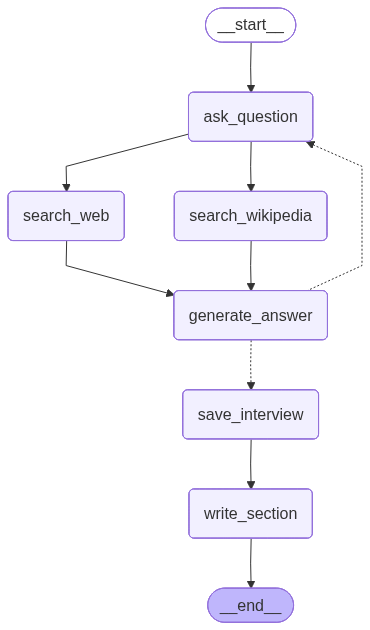

In [109]:
display(Image(interview_graph.get_graph().draw_mermaid_png()))

In [110]:
analyst

Analyst(name='Michael Chen', role='Business Strategy Consultant', affiliation='FutureTech Advisors', description='Michael advises companies on strategic technology adoption. He is interested in how Langgraph can be a strategic asset for businesses looking to innovate and stay ahead of the competition, particularly in terms of improving customer engagement and operational efficiency.')

In [111]:
analyst.persona

'Name: Michael Chen\nRole: Business Strategy Consultant\nAffiliation: FutureTech Advisors\nDescription: Michael advises companies on strategic technology adoption. He is interested in how Langgraph can be a strategic asset for businesses looking to innovate and stay ahead of the competition, particularly in terms of improving customer engagement and operational efficiency.\n'

In [112]:
thread = {"configurable": {"thread_id": "1"}}

In [113]:
from IPython.display import Markdown

In [114]:
messages = [HumanMessage("So you said you were writing an article on Langchain?")]

In [115]:
interview = interview_graph.invoke({"analyst": analyst, "messages": messages, "max_num_turns": 2}, thread)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


*******************************
search_query='Langgraph strategic applications in business customer engagement operational efficiency'


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


*******************************
search_query='Langgraph implementation examples for customer engagement and impact measurement'


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [117]:
Markdown(interview['sections'][0])

## Langgraph: A Strategic Asset for Business Innovation

### Summary

In the rapidly evolving landscape of AI technology, businesses are increasingly seeking strategic assets that can enhance customer engagement and operational efficiency. LangGraph emerges as a compelling solution for companies aiming to innovate and maintain a competitive edge. This report explores how LangGraph can be leveraged as a strategic asset, focusing on its potential to improve customer engagement and streamline operations.

LangGraph is a framework designed to manage workflows involving multiple AI agents, enabling businesses to automate complex tasks and improve decision-making processes. By organizing tasks in a graph-based structure, LangGraph allows agents to work in parallel, handle conditional steps, and share information through a centralized state. This approach is particularly beneficial for complex operations such as document analysis, customer support, and research coordination [1][2].

One of the novel aspects of LangGraph is its ability to support sophisticated orchestration patterns, which can be a double-edged sword. While it offers flexibility and scalability, it also introduces operational complexity that requires disciplined management [3]. Despite these challenges, LangGraph's ability to automate and augment complex workflows provides businesses with a strategic edge. Companies can deliver decisions and services with the speed and responsiveness enabled by AI, which is crucial in today's fast-paced market [2].

LangGraph's impact on operational efficiency is evident in real-world applications. For instance, AppFolio's use of LangGraph to create a copilot for property managers resulted in significant time savings and improved decision accuracy [4]. Similarly, LinkedIn's AI-powered recruiter, built on LangGraph, has streamlined hiring processes, allowing human recruiters to focus on strategic tasks [4].

However, LangGraph is not without its competitors. CALM, another AI framework, has been shown to outperform LangGraph in certain business metrics, such as cost efficiency and response times [1]. CALM's structured approach aligns tasks with predefined business logic, ensuring reliable performance and reducing errors that can impact customer satisfaction [1].

Despite these challenges, LangGraph remains a valuable tool for businesses looking to innovate. Its ability to build scalable agent systems and handle complex multi-turn conversations makes it an attractive option for companies aiming to enhance customer engagement and operational efficiency [2][4]. As businesses continue to adopt AI technologies, LangGraph's role as a strategic asset will likely grow, providing companies with the tools they need to stay ahead of the competition.

### Sources
[1] https://rasa.com/blog/enterprise-ready-ai-to-boost-customer-engagement/  
[2] https://www.scalablepath.com/machine-learning/langgraph  
[3] https://latenode.com/blog/langgraph-multi-agent-orchestration-complete-framework-guide-architecture-analysis-2025  
[4] https://blog.langchain.com/is-langgraph-used-in-production/  

## third Workflow

In [118]:
from typing_extensions import TypedDict
from typing import List, Annotated
import operator
class ResearchGraphState(TypedDict):
    topic: str # Research topic
    max_analysts: int # Number of analysts
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions
    sections: Annotated[list, operator.add] # Send() API key
    introduction: str # Introduction for the final report
    content: str # Content for the final report
    conclusion: str # Conclusion for the final report
    final_report: str # Final report
    
# class InterviewState(MessagesState):
#     max_num_turns: int # Number turns of conversation
#     context: Annotated[list, operator.add] # Source docs
#     analyst: Analyst # Analyst asking questions
#     interview: str # Interview transcript
#     sections: list # Final key we duplicate in outer state for Send() API

In [119]:
from langgraph.types import Send

In [120]:
def initiate_all_interviews(state:ResearchGraphState):
    """ This is the "map" step where we run each interview sub-graph using Send API """ 
    
    #check if human feedback
    human_analyst_feedback=state.get('human_analyst_feedback')
    if human_analyst_feedback:
        # Return to create_analysts
        return "create_analysts"
    
    # Otherwise kick off interviews in parallel via Send() API
    else:
        topic = state["topic"]
        return [Send("conduct_interview", {"analyst": analyst,
                                        "messages": [HumanMessage(
                                            content=f"So you said you were writing an article on {topic}?"
                                        )
                                                ]}) for analyst in state["analysts"]]


In [ ]:
# def write_report(state:ResearchGraphState):
#     """_summary_

#     Args:
#         state (ResearchGraphState): _description_
#     """
#     pass

In [121]:
report_writer_instructions = """You are a technical writer creating a report on this overall topic: 

{topic}
    
You have a team of analysts. Each analyst has done two things: 

1. They conducted an interview with an expert on a specific sub-topic.
2. They write up their finding into a memo.

Your task: 

1. You will be given a collection of memos from your analysts.
2. Think carefully about the insights from each memo.
3. Consolidate these into a crisp overall summary that ties together the central ideas from all of the memos. 
4. Summarize the central points in each memo into a cohesive single narrative.

To format your report:
 
1. Use markdown formatting. 
2. Include no pre-amble for the report.
3. Use no sub-heading. 
4. Start your report with a single title header: ## Insights
5. Do not mention any analyst names in your report.
6. Preserve any citations in the memos, which will be annotated in brackets, for example [1] or [2].
7. Create a final, consolidated list of sources and add to a Sources section with the `## Sources` header.
8. List your sources in order and do not repeat.

[1] Source 1
[2] Source 2

Here are the memos from your analysts to build your report from: 

{context}"""

In [122]:
def write_report(state: ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    system_message = report_writer_instructions.format(topic=topic, context=formatted_str_sections)    
    report = llm.invoke([SystemMessage(content=system_message)]+[HumanMessage(content=f"Write a report based upon these memos.")]) 
    return {"content": report.content}

In [123]:
intro_conclusion_instructions = """You are a technical writer finishing a report on {topic}

You will be given all of the sections of the report.

You job is to write a crisp and compelling introduction or conclusion section.

The user will instruct you whether to write the introduction or conclusion.

Include no pre-amble for either section.

Target around 100 words, crisply previewing (for introduction) or recapping (for conclusion) all of the sections of the report.

Use markdown formatting. 

For your introduction, create a compelling title and use the # header for the title.

For your introduction, use ## Introduction as the section header. 

For your conclusion, use ## Conclusion as the section header.

Here are the sections to reflect on for writing: {formatted_str_sections}"""

In [124]:
def write_introduction(state: ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    
    instructions = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)    
    intro = llm.invoke([instructions]+[HumanMessage(content=f"Write the report introduction")]) 
    return {"introduction": intro.content}

In [125]:
def write_conclusion(state: ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    
    instructions = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)    
    conclusion = llm.invoke([instructions]+[HumanMessage(content=f"Write the report conclusion")]) 
    return {"conclusion": conclusion.content}

In [126]:
def finalize_report(state: ResearchGraphState):
    """ The is the "reduce" step where we gather all the sections, combine them, and reflect on them to write the intro/conclusion """
    # Save full final report
    content = state["content"]
    if content.startswith("## Insights"):
        content = content.strip("## Insights")
    if "## Sources" in content:
        try:
            content, sources = content.split("\n## Sources\n")
        except:
            sources = None
    else:
        sources = None

    final_report = state["introduction"] + "\n\n---\n\n" + content + "\n\n---\n\n" + state["conclusion"]
    if sources is not None:
        final_report += "\n\n## Sources\n" + sources
    return {"final_report": final_report}

In [127]:
# Add nodes and edges 
builder = StateGraph(ResearchGraphState)
builder.add_node("create_analysts", create_analyst)
builder.add_node("human_feedback", human_feedback)
builder.add_node("conduct_interview", interview_builder.compile())
builder.add_node("write_report",write_report)
builder.add_node("write_introduction",write_introduction)
builder.add_node("write_conclusion",write_conclusion)
builder.add_node("finalize_report",finalize_report)

# Logic
builder.add_edge(START, "create_analysts")
builder.add_edge("create_analysts", "human_feedback")
builder.add_conditional_edges("human_feedback", initiate_all_interviews, ["create_analysts", "conduct_interview"])
builder.add_edge("conduct_interview", "write_report")
builder.add_edge("conduct_interview", "write_introduction")
builder.add_edge("conduct_interview", "write_conclusion")
builder.add_edge(["write_conclusion", "write_report", "write_introduction"], "finalize_report")
builder.add_edge("finalize_report", END)


In [128]:
memory = MemorySaver()

In [129]:
graph = builder.compile(interrupt_before=['human_feedback'], checkpointer=memory)

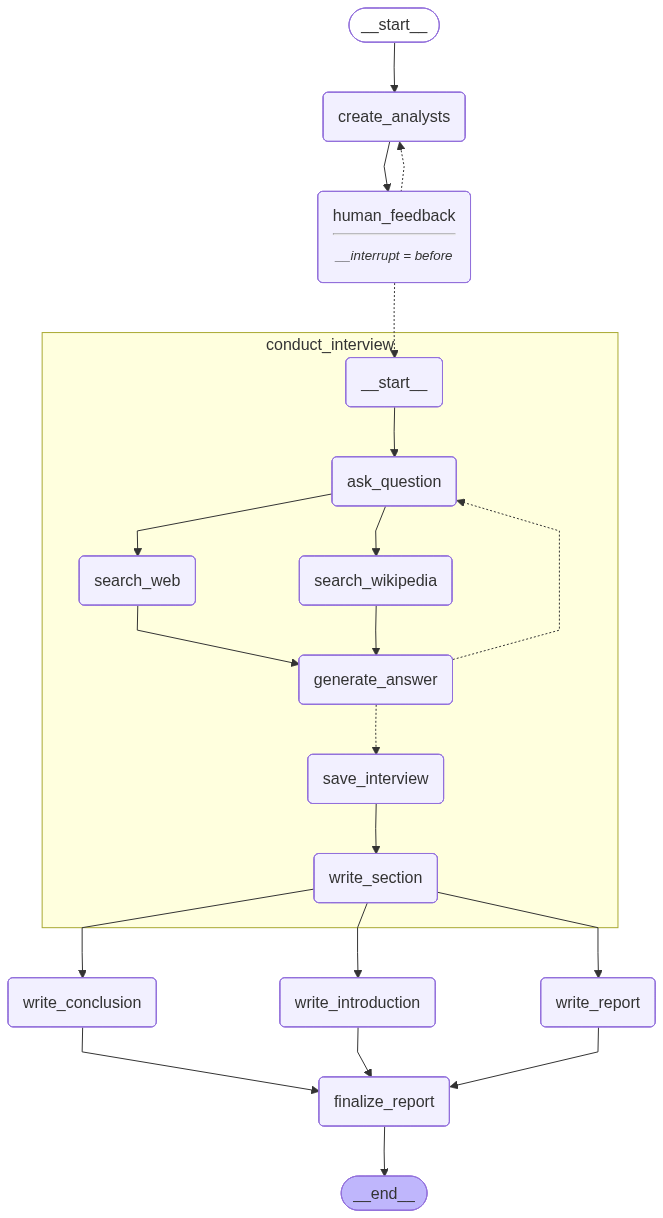

In [130]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [131]:
max_analysts = 3

In [132]:
topic = "How can generative help us to play the cricket?"

In [133]:
topic = "How can generative AI accelerate drug discovery?"

In [134]:
thread = {"configurable": {"thread_id": "1"}}

In [135]:
# Run the graph until the first interruption
for event in graph.stream({"topic":topic,"max_analysts":max_analysts}, thread, stream_mode="values"):
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50) 

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Name: Dr. Emily Chen
Affiliation: Stanford University
Role: AI and Computational Biology Expert
Description: Dr. Chen focuses on the integration of generative AI models with biological data to accelerate the drug discovery process. Her primary concern is ensuring that AI models are trained on diverse and comprehensive datasets to improve their predictive accuracy and reliability. She is motivated by the potential of AI to significantly reduce the time and cost associated with bringing new drugs to market.
--------------------------------------------------
Name: Dr. Raj Patel
Affiliation: Pfizer Inc.
Role: Pharmaceutical Industry Strategist
Description: Dr. Patel analyzes the strategic implications of adopting generative AI in pharmaceutical companies. He is concerned with how AI can be integrated into existing drug development pipelines to enhance efficiency and innovation. His motive is to identify ways in which AI can provide a competitive advantage in the rapidly evolving pharmaceut

In [136]:
graph.update_state(thread, {"human_analyst_feedback":"along with the genetive ai in future tell me the future of indian team"}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b7f05-da8a-6ca7-8002-cb868b51f166'}}

In [137]:
# Run the graph until the first interruption
for event in graph.stream({"topic":topic,"max_analysts":max_analysts}, thread, stream_mode="values"):
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50) 

Name: Dr. Emily Chen
Affiliation: Stanford University
Role: AI and Computational Biology Expert
Description: Dr. Chen focuses on the integration of generative AI models with biological data to accelerate the drug discovery process. Her primary concern is ensuring that AI models are trained on diverse and comprehensive datasets to improve their predictive accuracy and reliability. She is motivated by the potential of AI to significantly reduce the time and cost associated with bringing new drugs to market.
--------------------------------------------------
Name: Dr. Raj Patel
Affiliation: Pfizer Inc.
Role: Pharmaceutical Industry Strategist
Description: Dr. Patel analyzes the strategic implications of adopting generative AI in pharmaceutical companies. He is concerned with how AI can be integrated into existing drug development pipelines to enhance efficiency and innovation. His motive is to identify ways in which AI can provide a competitive advantage in the rapidly evolving pharmaceut

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Name: Dr. Aisha Patel
Affiliation: Institute of Computational Medicine
Role: AI and Computational Biology Specialist
Description: Dr. Patel focuses on the integration of generative AI in computational biology to enhance drug discovery processes. Her primary concern is how AI can be used to model complex biological systems and predict drug interactions more efficiently. She is motivated by the potential of AI to reduce the time and cost associated with bringing new drugs to market.
--------------------------------------------------
Name: Rajesh Kumar
Affiliation: Global Pharma Insights
Role: Pharmaceutical Industry Analyst
Description: Rajesh Kumar analyzes the impact of emerging technologies on the pharmaceutical industry, with a particular focus on generative AI. He is interested in how AI can streamline the drug development pipeline, from initial discovery to clinical trials. His concerns include regulatory challenges and the need for industry-wide standards to ensure AI-driven drug 

In [138]:
graph.update_state(thread, {"human_analyst_feedback":""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b7f06-6b79-6a84-8006-c486b66679c4'}}

In [139]:
graph.get_state(thread).next

('conduct_interview', 'conduct_interview', 'conduct_interview')

In [145]:
# Continue
for event in graph.stream(None, thread, stream_mode="updates"):
    print("--Node--")
    node_name = next(iter(event.keys()))
    print(node_name)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


*******************************
search_query='ethical implications of generative AI in drug discovery'


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
Retrying request to /chat/completions in 0.381657 seconds
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


*******************************
search_query='examples of generative AI in modeling complex biological systems for drug discovery'


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
Retrying request to /chat/completions in 0.975260 seconds
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"


RateLimitError: Error code: 429 - {'error': {'message': 'Request too large for gpt-4o in organization org-aD0ihgJptXoigOYC1Frz4qoy on tokens per min (TPM): Limit 30000, Requested 42786. The input or output tokens must be reduced in order to run successfully. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}

In [141]:
from IPython.display import Markdown

In [142]:
final_state = graph.get_state(thread)


In [143]:
report = final_state.values.get('final_report')

In [144]:
Markdown(report)

<IPython.core.display.Markdown object>